https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv

Red Wine Quality Prediction Project


Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):


1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv



In [29]:
# importing necessory libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# download data file in local system
data = pd.read_csv(r'C:\Assignements & HW\Internship\project1\winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploratory Data Analysis (EDA)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# check the shape of dataset
data.shape

(1599, 12)

In [6]:
# Check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

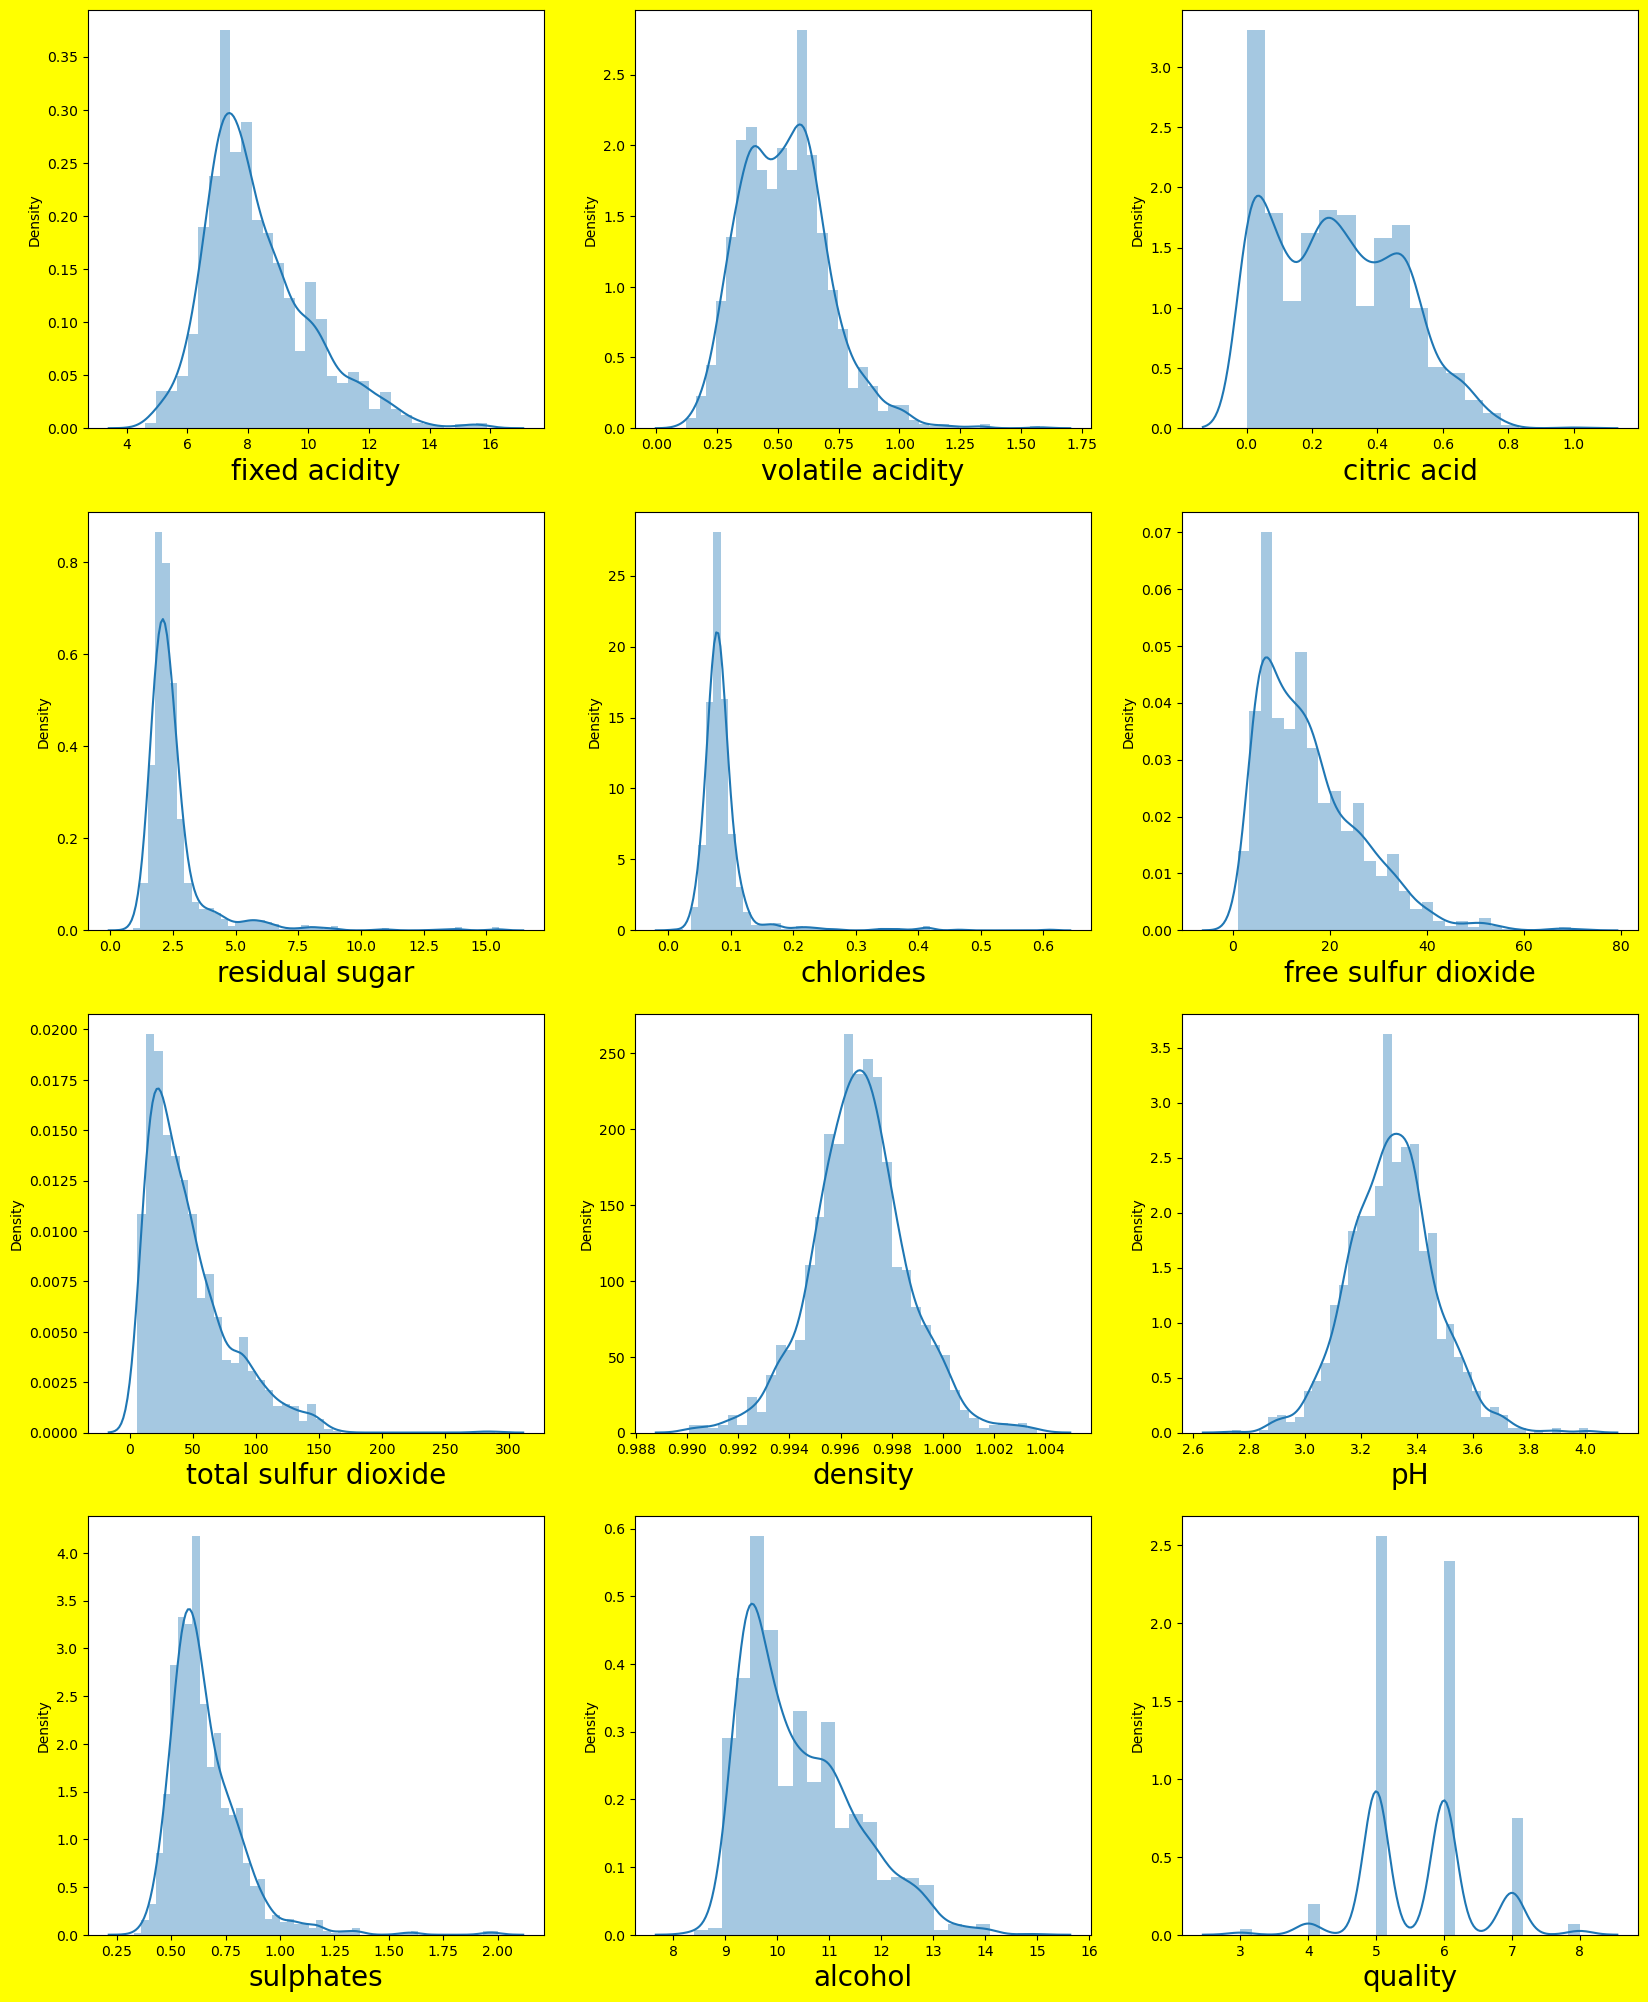

In [12]:
# Let's see how data is distributed for every column 

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.show()

In [13]:
# Check the missing null value 
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see there are no null values present in the dataset 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


    This gives the brief about the data set which includes indexing type, column type, no null values and memory usage

<Axes: >

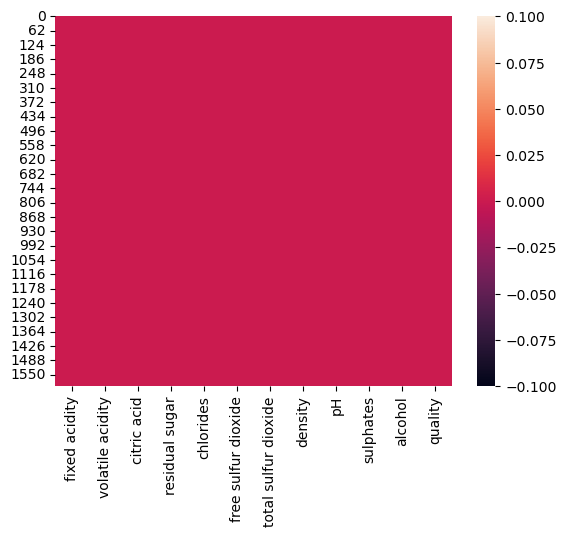

In [15]:
# Let's the visualize it using heatmap
sns.heatmap(data.isnull())

And we can clearly visualize that there is no missing data present

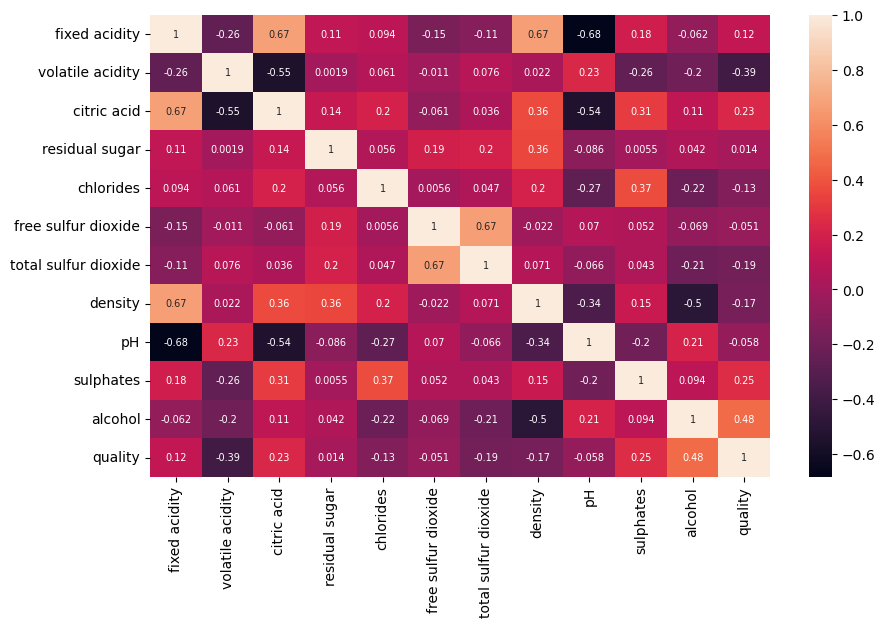

In [16]:
# Plotting Heatmap (Correlation matrix)
df_corr = data.corr() # this code will get the coefficient of one variable vs all other variable (relationship)

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':7})
plt.show()

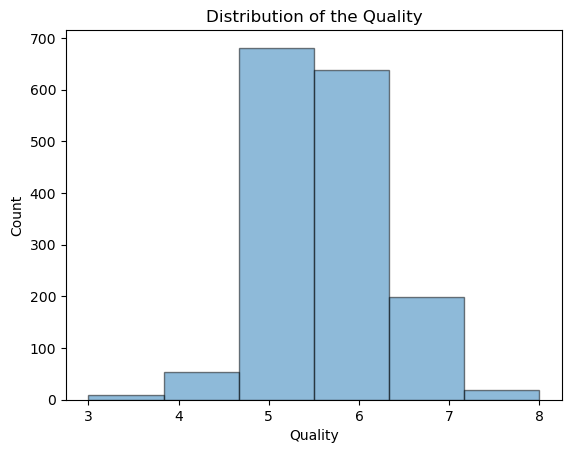

In [17]:
# check the quality no. of count using histogram

plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


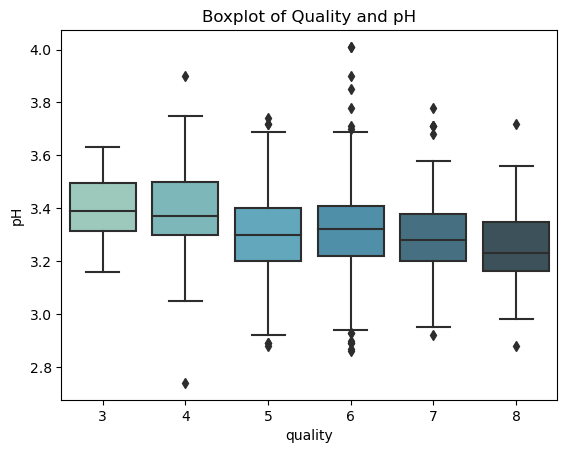

In [18]:
# check realtionship between quality and ph using box plot

sns.boxplot(x='quality',y='pH',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()


As we can see ph does not effect of the quality

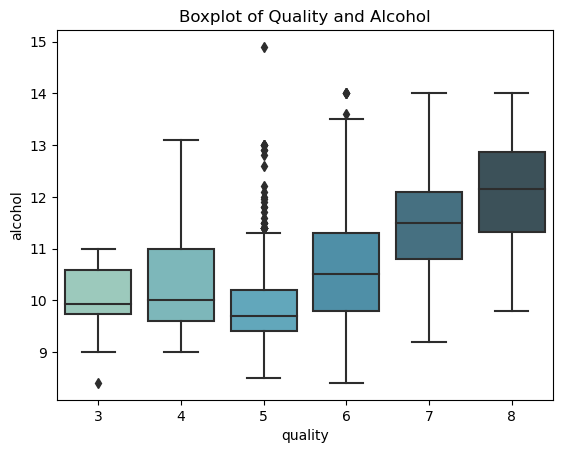

In [19]:
# check the relationship between quality and alcohol using boxplot

ax = sns.boxplot(x='quality',y='alcohol',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()


The above plot shows the increase in the quality of wine with increase in alcohol. The quality of the wine is directly related to the alcohol in the wine.

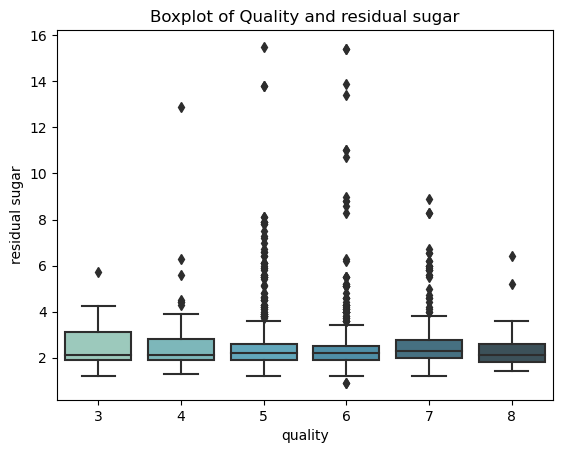

In [20]:
# check the relationship between quality and residual sugar using boxplot
sns.boxplot(x="quality",y="residual sugar",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()


There is no much effect of the residual sugar on the quality of the wine.

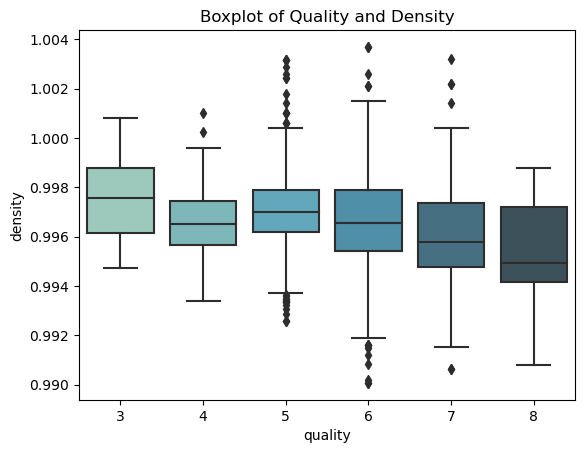

In [21]:
# check the relationship between quality and density using boxplot
sns.boxplot(x="quality",y="density",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()


Lower the density of wine better will be the quality of the wine. From the above boxplot we acn visualize that the quality of wine increases with decrease in density.

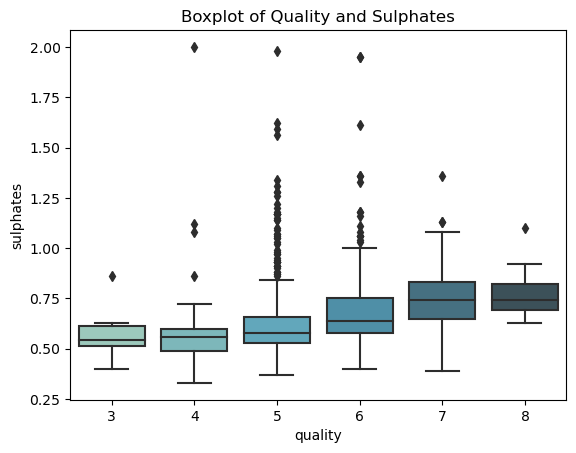

In [22]:
# check the relationship between quality and sulphates using boxplot
sns.boxplot(x="quality",y="sulphates",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

The above plot represents that the quality of alcohol increases with the increase in the amount of sulphates in the wine.

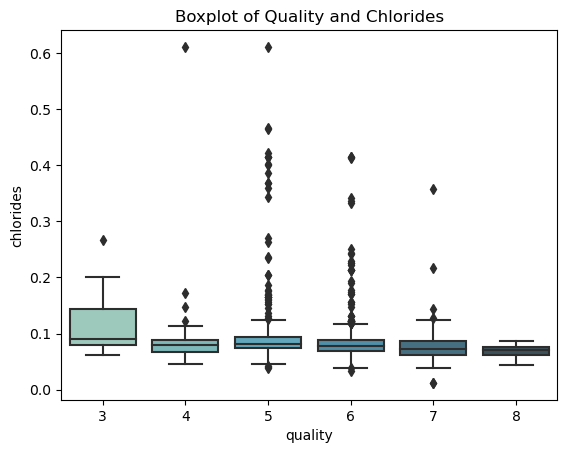

In [23]:
# check the relationship between quality and chlorides using boxplot

sns.boxplot(x="quality",y="chlorides",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Chlorides")
plt.show()


From the above plot we can see that there is not even a slight change in the quality of wine for a particular amount of chlorides mixed in them.

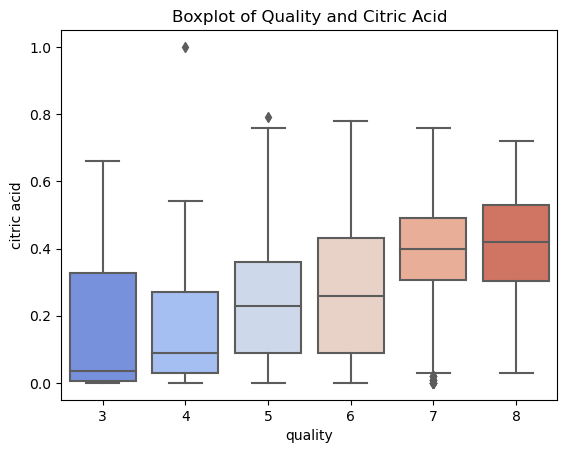

In [24]:
# check the relationship between quality and citirc acid using boxplot

sns.boxplot(x="quality",y="citric acid",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()


The quality of the wine increses with increase in the amount of citric acid in the wine.

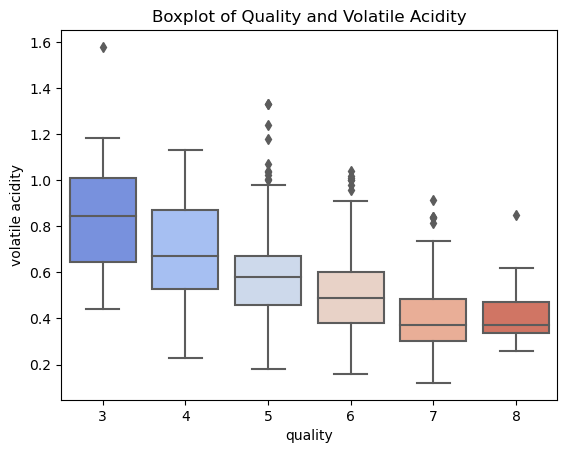

In [25]:
# check the relationship between quality and volatile acidity using boxplot

sns.boxplot(x="quality",y="volatile acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()


From the above boxplot we can see that the quality of wine increases with the decrease in the amount of volatile acids.

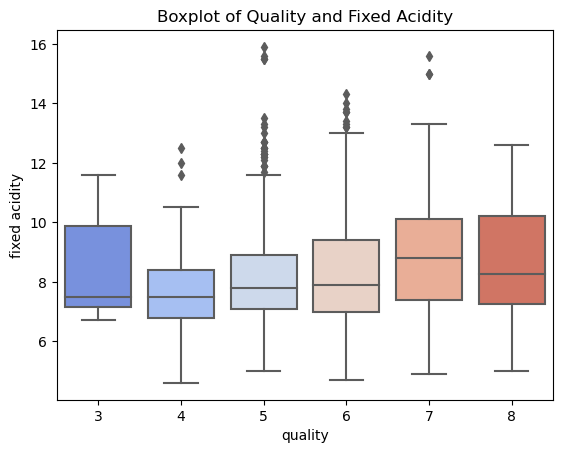

In [26]:
# check the relationship between quality and fixed acidity using boxplot

sns.boxplot(x="quality",y="fixed acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()

Effect of acidity on the quality of wine

1).	Citric Acid

2).	Volatile Acidity

3).	Fixed Acidity


In [34]:
# Let's start with import necessary libraries 


import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [35]:
# Removing outliers 

z=np.abs(zscore(data))
threshold=3
np.where(z>3)

data=data[(z<3).all(axis=1)]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


I have used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [38]:
data.shape

(1451, 12)

# Separating features and label 

In [39]:
x = data.drop("quality",axis = 1)
y = data["quality"]

In [40]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

 label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

# Taking care of class imbalance

In [41]:


oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [42]:
y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [43]:
y

0       5
1       5
2       5
3       6
4       5
       ..
3080    8
3081    8
3082    8
3083    8
3084    8
Name: quality, Length: 3085, dtype: int64

# Label Binarization

In [44]:
y=y.apply(lambda y_value:1 if y_value>=7 else 0)

In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3080    1
3081    1
3082    1
3083    1
3084    1
Name: quality, Length: 3085, dtype: int64

Using the label binarization technique we have tagged the categories present in our target label to 2 major class that are 0 for bad and 1 for good quality wine.

In [46]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
3080,9.281738,0.387884,0.492428,2.496661,0.071303,6.697104,15.545656,0.995071,3.213029,0.709688,12.515145
3081,8.662445,0.416327,0.392204,1.968970,0.068184,5.963267,12.036733,0.995250,3.345592,0.694775,11.733059
3082,9.536449,0.386361,0.508183,2.018224,0.070727,6.454439,16.000000,0.995324,3.193633,0.679089,12.090829
3083,10.306375,0.452653,0.612474,3.944895,0.082862,6.000000,17.954079,0.997545,3.183393,0.810281,12.510967


# Feature scaling using standard Scalarization

In [48]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.675786,1.043990,-1.525000,-0.649831,-0.140107,-0.277856,-0.109742,0.814717,1.490240,-0.795490,-1.270629
1,-0.422649,2.057966,-1.525000,0.119371,1.113678,1.271719,1.148419,0.210534,-0.754211,0.111717,-0.906500
2,-0.422649,1.381982,-1.318612,-0.210287,0.771737,0.164879,0.652780,0.331370,-0.319801,-0.115085,-0.906500
3,1.729015,-1.321952,1.364433,-0.649831,-0.197097,0.386247,0.881536,0.935554,-1.043817,-0.644289,-0.906500
4,-0.675786,1.043990,-1.525000,-0.649831,-0.140107,-0.277856,-0.109742,0.814717,1.490240,-0.795490,-1.270629
...,...,...,...,...,...,...,...,...,...,...,...
3080,0.515058,-0.714219,1.015780,0.005816,-0.407796,-0.754118,-0.813334,-0.833908,-0.659879,0.336162,1.565158
3081,0.123143,-0.553997,0.498656,-0.574043,-0.585562,-0.835342,-0.947116,-0.726175,0.299900,0.223419,0.853208
3082,0.676250,-0.722800,1.097075,-0.519919,-0.440604,-0.780977,-0.796012,-0.681377,-0.800308,0.104828,1.178894
3083,1.163492,-0.349366,1.635185,1.597221,0.250973,-0.831276,-0.721510,0.660587,-0.874450,1.096649,1.561355


Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

# Creating the training and testing data sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Machine Learning Model for Classification and Evaluation Metrics

In [52]:
# Classification Model Function

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [54]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, y)

Accuracy Score: 91.41004862236629

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       375
           1       0.88      0.90      0.89       242

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

Cross Validation Score: 87.3581847649919

Accuracy Score - Cross Validation Score is 4.051863857374386


Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

# Hyper parameter tuning on the Decision Tree Model

In [64]:
# We are tunning four important hyperparameters right now, we are passing the different values for both parameters

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,15),        # The maximium depth of the tree
    'min_samples_leaf': range(2,6),    # The minimium no.of samples required to be at a leaf node.
    'min_samples_split': range(3,8),   # the minimium no.of samples to split an internal node 
    'max_leaf_nodes': range(20,50)      # If None than unlimilted number of leaf nodes.
}

In [65]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=grid_param,
                           cv=5, 
                           n_jobs = -1)
# use all the cores in your system. for performence improvement

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [66]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=15, random_state=21),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(20, 50),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [67]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': 48, 'min_samples_leaf': 2, 'min_samples_split': 5}


Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [81]:
Final_model = DecisionTreeClassifier(criterion='gini',max_depth=12, max_leaf_nodes=48, min_samples_leaf=2, min_samples_split=5)
Final_model.fit(X_train, y_train)
pred = Final_model.predict(X_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

90.92382495948137


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve

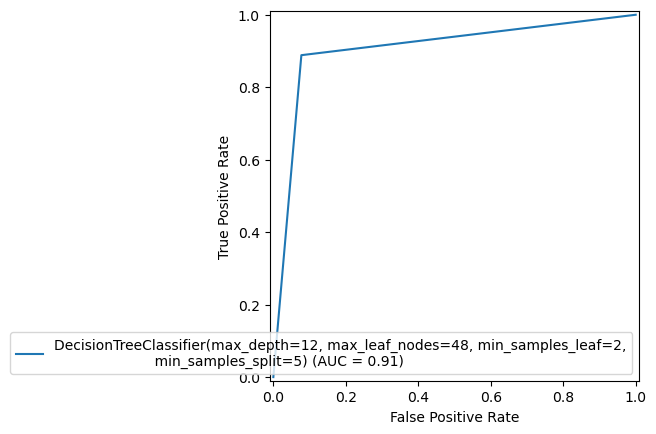

In [82]:
# Plotting for all the models used here 
from sklearn import datasets
from sklearn import metrics 
from sklearn import model_selection 


from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name = Final_model)
display.plot()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 91%

# Confusion Matrix

In [84]:
cfm=confusion_matrix(y_test,pred)
cfm

array([[346,  29],
       [ 27, 215]], dtype=int64)

# Saving the model

In [86]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_model, "Redwine_quality.pkl")

['Redwine_quality.pkl']

# Predicting the saved model 

In [88]:
# Let's load the saved model and get the prediction 

model = joblib.load("Redwine_quality.pkl")

# Prediction 

prediction = model.predict(X_test)
prediction

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

These are the predicted quality values for the wine.

In [89]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
612,1,1
613,0,0
614,1,1
615,1,1
